In [5]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import os

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import save_model, load_model
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau


### Analyzing

In [6]:
# Importing Dataset

train_dir = './data/train/'
test_dir = './data/test/'

In [7]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
    plt.figure(figsize=(10, 10))  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()        
        plt.axis('off')
        plt.imshow(img, cmap='gray') 

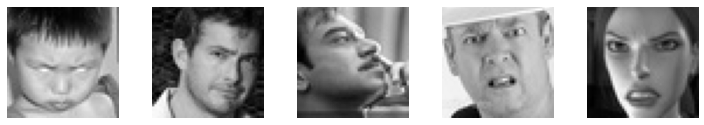

In [8]:
# ANGRY
plot_images(train_dir+'/angry')

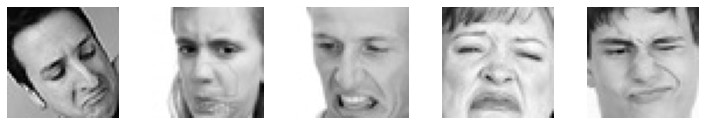

In [9]:
# DISGUSTED
plot_images(train_dir+'/disgust')

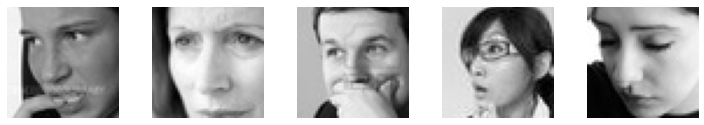

In [10]:
# FEARFUL
plot_images(train_dir+'/fear')

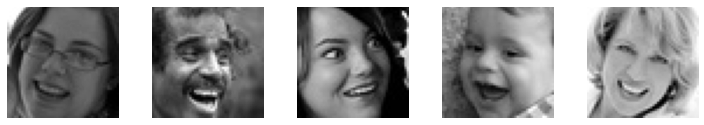

In [11]:
# HAPPY
plot_images(train_dir+'/happy')

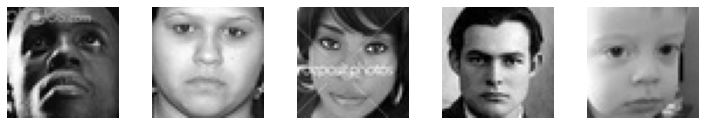

In [12]:
# NEUTRAL
plot_images(train_dir+'/neutral')

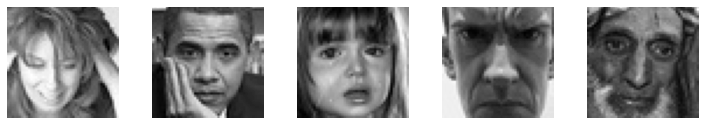

In [13]:
# SAD
plot_images(train_dir+'/sad')

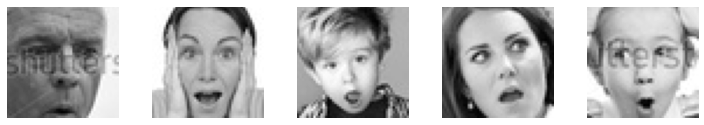

In [14]:
# SURPRISED
plot_images(train_dir+'/surprise')

In [15]:
def plot_bar_chart_diagram(path_data):
  dic={}
  for emotion in  os.listdir(path_data):
    dem=0
    for x in os.listdir(path_data+"/"+emotion):
      dem+=1
    dic[emotion]=dem
  print(dic)
  barlist=plt.bar(range(len(dic)), list(dic.values()),tick_label=list(dic.keys()))
#set color
  plt.show()

{'angry': 3986, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}


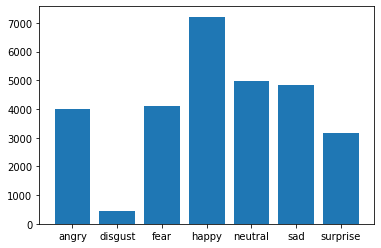

In [16]:
plot_bar_chart_diagram(train_dir)

{'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


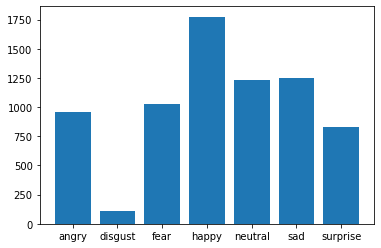

In [17]:
plot_bar_chart_diagram(test_dir)  

### Data Generator

In [18]:
# Create Training and Validation Batches by Using the ImageDataGenerator

img_size = 48
batch_size = 64

data_train = ImageDataGenerator(horizontal_flip=True)
train_generator = data_train.flow_from_directory(train_dir, target_size=(img_size,img_size), color_mode="grayscale",
                                                    batch_size=batch_size, class_mode='categorical', shuffle=True)

data_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = data_validation.flow_from_directory(test_dir, target_size=(img_size,img_size), color_mode="grayscale",
                                                    batch_size=batch_size, class_mode='categorical', shuffle=False)

Found 28700 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Create Convolutional Nueral Network (CNN) Model
Create a Nueral Network using 4 Convolutional Layers and 2 Fully Connected dense Layers.

In [19]:
# Initialising the CNN
model = Sequential()

In [20]:
# 1st Convolution Layer

# There are 64 (3,3) filters with "same" Padding and Shape of the Input_Image is (48,48,1)
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))

# Normalizing to speed up learning.
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))  

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with 0.25 fraction of the input units to drop
model.add(Dropout(0.25))

In [21]:
# 2nd Convolution layer

# There are 128 (5,5) filters with "same" Padding 
model.add(Conv2D(128,(5,5), padding='same'))

# Normalizing to speed up learning.
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with 0.25 fraction of the input units to drop
model.add(Dropout(0.25))

In [22]:
# 3rd Convolution layer

# There are 512 (3,3) filters with "same" Padding 
model.add(Conv2D(512,(3,3), padding='same'))

# Normalizing to speed up learning.
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with 0.25 fraction of the input units to drop
model.add(Dropout(0.25))

In [23]:
# 4th Convolution layer

# There are 512 (3,3) filters with "same" Padding 
model.add(Conv2D(512,(3,3), padding='same'))

# Normalizing to speed up learning.
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Adding a Max Pool Layer of size (2,2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer with 0.25 fraction of the input units to drop 
model.add(Dropout(0.25))

In [24]:
# Flattening
model.add(Flatten())

# Fully connected layer with 256 nuerons
model.add(Dense(256))

# Normalizing to speed up learning.
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Dropout layer with 0.25 fraction of the input units to drop
model.add(Dropout(0.25))


# Fully connected layer with 512 nuerons
model.add(Dense(512))

# Normalizing to speed up learning.
model.add(BatchNormalization())

# Applying Non Linear Activation Function "relu"
model.add(Activation('relu'))

# Dropout layer with 0.25 fraction of the input units to drop
model.add(Dropout(0.25))

# Adding a final Dense Layer with 7 outputs corresponding to 7 different emotions with a "softmax" Activation Function 
model.add(Dense(7, activation='softmax'))

### Compiling the Model
I will use Adam Optimizer

In [25]:
# Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent 
# procedure to update network weights iterative based in training data.

# choose a Learning rate of 0.0005 
opt = Adam(learning_rate=0.0005)

# Compile defines the loss function, the optimizer and the metrics.

# As I have Categorical Values we will use 'categorical_crossentropy' loss function
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# check the details of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

### Train and Evaluate Model

In [34]:
# Because my computer is not powerful, I will use the training for 15 epochs and that takes (15 minutes for each one epoch)

epochs = 15

steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

# Create a Callback which reduces the Learning rate by a factor of "0.1" when the val_loss does not decrease
# after 2 epochs also and allowing the minimum value of Learning Rate to be 0.00001
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

# Create another Callback which saves the Model Weights by monitoring the Val_Accuracy
checkpoint = ModelCheckpoint("./model/model_weights_s1.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)

# A callback is an object that can perform actions at various stages of training
callbacks = [checkpoint, reduce_lr]

# Fitting the model
history = model.fit( x=train_generator, steps_per_epoch=steps_per_epoch,
                     epochs=epochs, validation_data = validation_generator,
                     validation_steps = validation_steps, callbacks=callbacks)

448/448 [==============================] - ETA: 0s - loss: 1.6912 - accuracy: 0.3523
Epoch 1: saving model to model_weights_s1.h5
448/448 [==============================] - 1182s 3s/step - loss: 1.6912 - accuracy: 0.3523 - val_loss: 1.7980 - val_accuracy: 0.3184 - lr: 5.0000e-04


In [35]:
# Save Model
# save_model(model,'./model/model_1.h5')